I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha) \frac{1}{2}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

Solución

In [95]:
# Importo la librerias necesarias
from scipy import integrate
import numpy as np
import pandas as pd
import matplotlib,pylab as plt

In [70]:
# Defino T y T0
def T0(l,g=9.80665):
    return 2*np.pi*np.sqrt(l/g)
def T(θ,l,g=9.80665):
    k=np.sin(θ/2)
    return (2*T0(l,g)/np.pi)*integrate.quad(lambda u:(1)/(np.sqrt(1-k**2*np.sin(u)**2)),0,np.pi/2)[0]
Tv=np.vectorize(T) # vectorizo la función T para usar un conjunto de valores de θ

In [71]:
θ = np.linspace(0,np.pi/2,100) # defino el conjunto de valores de θ
θ = np.asarray(θ) # vuelvo un array de numpy el conjunto
l=1 # para este problema, sin pérdida de generalidad vamos a tomar l=1 

In [98]:
T0_list = np.ones(θ.shape[0])*T0(l) # defino una lista con la misma longitud del número de valores del conjunto θ
T0_list

array([2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640929,
       2.00640929, 2.00640929, 2.00640929, 2.00640929, 2.00640

In [99]:
Tv(θ,l) # ejecutamos la función vectorizada de T con los elementos del conjunto θ

array([2.00640929, 2.00644086, 2.00653558, 2.00669346, 2.00691452,
       2.00719882, 2.00754639, 2.0079573 , 2.00843161, 2.00896942,
       2.00957081, 2.01023589, 2.01096478, 2.01175759, 2.01261448,
       2.01353559, 2.01452107, 2.01557112, 2.0166859 , 2.01786561,
       2.01911047, 2.02042068, 2.0217965 , 2.02323815, 2.0247459 ,
       2.02632001, 2.02796076, 2.02966846, 2.0314434 , 2.0332859 ,
       2.03519631, 2.03717497, 2.03922223, 2.04133847, 2.04352407,
       2.04577945, 2.04810502, 2.05050121, 2.05296845, 2.05550723,
       2.058118  , 2.06080127, 2.06355754, 2.06638734, 2.0692912 ,
       2.07226969, 2.07532337, 2.07845285, 2.08165873, 2.08494164,
       2.08830222, 2.09174115, 2.0952591 , 2.09885679, 2.10253494,
       2.10629429, 2.11013561, 2.11405969, 2.11806735, 2.12215941,
       2.12633674, 2.13060021, 2.13495073, 2.13938924, 2.14391668,
       2.14853405, 2.15324235, 2.15804262, 2.16293594, 2.16792338,
       2.17300609, 2.17818522, 2.18346195, 2.18883752, 2.19431

In [100]:
Tv(θ,l)/T0_list

array([1.        , 1.00001573, 1.00006294, 1.00014163, 1.00025181,
       1.0003935 , 1.00056673, 1.00077153, 1.00100793, 1.00127597,
       1.00157571, 1.00190719, 1.00227047, 1.00266561, 1.00309268,
       1.00355177, 1.00404293, 1.00456628, 1.00512189, 1.00570986,
       1.0063303 , 1.00698332, 1.00766903, 1.00838755, 1.00913901,
       1.00992355, 1.01074131, 1.01159243, 1.01247707, 1.01339538,
       1.01434753, 1.0153337 , 1.01635406, 1.0174088 , 1.01849811,
       1.0196222 , 1.02078127, 1.02197553, 1.02320522, 1.02447055,
       1.02577177, 1.02710911, 1.02848285, 1.02989323, 1.03134052,
       1.03282501, 1.03434697, 1.03590671, 1.03750453, 1.03914074,
       1.04081567, 1.04252964, 1.04428299, 1.04607609, 1.04790929,
       1.04978296, 1.05169749, 1.05365326, 1.05565069, 1.05769018,
       1.05977217, 1.0618971 , 1.06406541, 1.06627758, 1.06853407,
       1.07083538, 1.07318201, 1.07557448, 1.07801332, 1.08049907,
       1.08303231, 1.0856136 , 1.08824354, 1.09092274, 1.09365

In [110]:
df = pd.DataFrame({"θ": θ, "θ(grados)": θ*180/np.pi, "Ratio": Tv(θ,l)/T0_list})  # definimos el dataframe, nótese que Ratio = T/T0
df

,θ,θ(grados),Ratio
0,0.000000,0.000000,1.000000
1,0.015867,0.909091,1.000016
2,0.031733,1.818182,1.000063
3,0.047600,2.727273,1.000142
4,0.063467,3.636364,1.000252
...,...,...,...
95,1.507330,86.363636,1.163806
96,1.523196,87.272727,1.167832
97,1.539063,88.181818,1.171930
98,1.554930,89.090909,1.176099


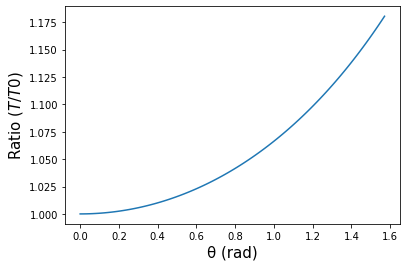

In [114]:
# Mostramos el gráfico de T/T0 vs θ (en radianes)
plt.plot( df.θ, df.Ratio )
plt.xlabel('θ (rad)' ,size=15)
plt.ylabel(r'Ratio ($T/T0$)' ,size=15)
plt.show()

II)
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$
2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

Solución

1)

In [3]:
# Importamos la libraria que necesitamos
import numpy as np

In [4]:
# Definimos los autovalores del problema
λ1 = 2
λ2 = 4

In [7]:
# Definimos la matriz de diagonalización para ángulos de mezcla
def orthogonal(θ):
    return np.array( [[np.cos(θ) ,np.sin(θ)],
                      [-np.sin(θ),np.cos(θ)]]   )

In [130]:
np.random.seed(1000293341) # usamos mi número de identificación como semilla
R = np.random.random( (2,2) ) # definimos R
R

array([[0.60388572, 0.55867789],
       [0.5802585 , 0.04321585]])

In [88]:
D2 = np.diag([np.sqrt(2),np.sqrt(4)]) # definimos a D2 como la matriz cuya diagonal es representada por la raíz cuadrada de los autovalores
D2

array([[1.41421356, 0.        ],
       [0.        , 2.        ]])

In [89]:
U = orthogonal(np.pi/4) # definimos la matriz de diagonalización U
U

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [125]:
Y = np.dot(  np.dot( R, D2 ), U.transpose() ) # mostramos la matriz Y
Y

array([[ 1.39397557,  0.18620413],
       [ 0.64137495, -0.51914206]])

In [129]:
Y.transpose()

array([[ 1.39397557,  0.64137495],
       [ 0.18620413, -0.51914206]])

2)

Nótese que

\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}

Así:

In [131]:
D = np.dot( D2, D2 ) # definimos D sub lambda
D

array([[2., 0.],
       [0., 4.]])

In [133]:
Y_ = np.dot(  np.dot( U, D ), U.transpose() ) # nótese que Y_ es Y transpuesta multiplicada con Y
Y_

array([[3., 1.],
       [1., 3.]])

Ahora,

$$
A=Y^{\operatorname{T}}Y
$$

De modo que:

In [134]:
A = Y_
A

array([[3., 1.],
       [1., 3.]])

Verificaremos que A cuenta con los autovalores pedidos de la siguiente forma:

$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$

In [138]:
D_ = np.dot(  np.dot( U.transpose(), A ), U ).round(14)
D_

array([[2., 0.],
       [0., 4.]])

Por tanto nótese que se obtienen los mismos autovalores definidos en un inicio.

Otra forma, en la cual podemos obtener, además, los autovalores es:

In [139]:
λ,U_=np.linalg.eig( A )

In [140]:
λ

array([2., 4.])

In [141]:
U_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

De esta forma, comprobamos que los autovalores y autovectores son:

In [144]:
print("Los autovalores son", λ[0].round(0), "y", λ[1].round(0))

Los autovalores son 2.0 y 4.0


In [150]:
print("Los autovectores son:") 
print(np.c_[U_[:,0]])
print(np.c_[U_[:,1]])

Los autovectores son:
[[-0.70710678]
 [ 0.70710678]]
[[-0.70710678]
 [-0.70710678]]


Nótese que los autovectores son precisamente los definidos por la matriz de diagonalización U que definimos en un inicio.